In [1]:
import numpy as np
from numpy.typing import NDArray
from typing import Any
import scipy as sp
from scipy.linalg import eig
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt

$$
\frac{\partial^2{x}}{\partial^2{t}} = \
    a\frac{\partial{x}}{\partial{t}} + \
    bx
$$

from a single system of 2nd degree ODE to two 1st degree ODE's

$$
v =  \frac{\partial{x}}{\partial{t}} \\
\frac{\partial{v}}{\partial{t}} = \
\frac{\partial^2{x}}{\partial^2{t}}
$$

In [2]:
a = 1
b = 0.1
A = np.array([[0,1], [a,b]])

[D, T] = eig(A)

In [3]:
t1 = T[:,0]
t2 = T[:,1]


In [4]:
# define time base and initial condition
t = np.linspace(0, 10, 1000)
y0 = [2, -3]

x = np.exp(D[0]*t) + np.exp(D[1]* t)
# plt.plot(t, x, 'k')

def linear_ode(t, y):
    return A @ y

linear_ode_solution = solve_ivp(linear_ode, (0, 10), y0, t_eval=t)
y = linear_ode_solution.y
#plt.plot(t, y[0, :], 'r--')
#plt.xlabel('Time [s]')
#plt.ylabel('Solution x')
#plt.legend(['Analytic', 'RK45'])
#plt.grid(True)

# eigenvalues of A should be roots of characteristic equation!
eigvals, eigvecs = np.linalg.eig(A)
print(eigvals)

[-0.95124922  1.05124922]


In [5]:
def plot_dynamics(fig, ax,
                  vector_field,
                  x_left, x_right, x_res, y_down, y_up, y_res):
    x, y = np.meshgrid(np.linspace(x_left, x_right, x_res), np.linspace(y_down, y_up, y_res))
    Vx, Vy = vector_field(x=x, y=y)
    if type(Vx) != object:
        Vx = Vx * np.ones(x.shape, dtype=float)
    if type(Vy) != object:
        Vy = Vy * np.ones(x.shape, dtype=float)
        
    #ax.set_aspect( 1 )
    ax.streamplot(x, y, Vx, Vy)
    return None

def plot_dynamics_vec(fig, ax,
                  vector_field,
                  x_left, x_right, x_res, y_down, y_up, y_res):
    x, y = np.meshgrid(np.linspace(x_left, x_right, x_res), np.linspace(y_down, y_up, y_res))
    X = np.stack((x,y), axis=0).reshape(2,-1)
    Y = vector_field(X)
    #ax.set_aspect( 1 )

    Y = Y.reshape(2,*x.shape)
    X = X.reshape(2,*x.shape)
    ax.streamplot(X[0], X[1], Y[0], Y[1])
    return None

[[0.       -0.5j 0.       +0.5j]
 [0.8660254+0.j  0.8660254-0.j ]]


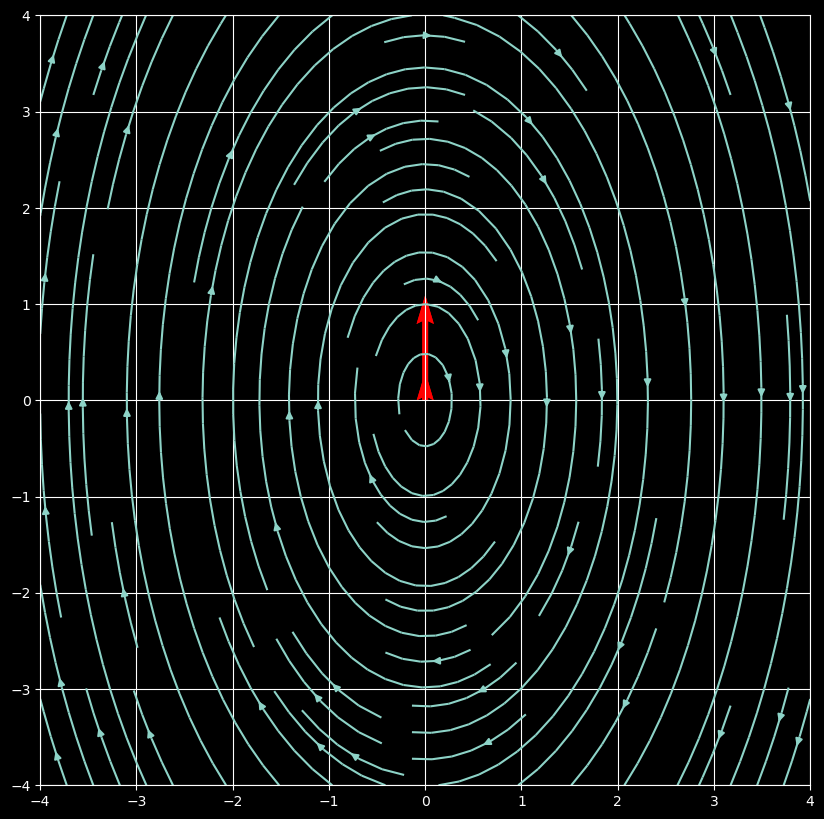

In [63]:
# type the formulas for the x and y components of the vector fields 
# (use np.cos and np.sin etc if not polynomial vector fields):
    
fig, ax = plt.subplots(figsize=(10,10))
plt.grid()
ax.set_aspect('equal')    
plt.style.use('dark_background')

x_left=-4; x_right=4; x_res=100
y_down=-4; y_up=4; y_res=100

a1 = 0
b1 = 1
a2 = -3
b2 = 0

A = np.array([
    [a1, b1],
    [a2, b2]])
def V(x:NDArray, A: NDArray=A):    
    return (A@x) 

plot_dynamics_vec(fig=fig, ax=ax, vector_field=V, 
                  x_left=x_left, x_right=x_right, x_res=x_res,
                  y_down=y_down, y_up=y_up, y_res=y_res)


# plot_eigenvectors(A, n_pts, 
[D, T] = sp.linalg.eig(A)

t0 = T[:,0]
t1 = T[:,1]

origin = np.array([[0,0],[0,0]])
ax.quiver(*origin, *t0, color=['r'], scale=10)
ax.quiver(*origin, *t1, color=['r'], scale=10)

print(T)
plt.show()

### Non linear systems

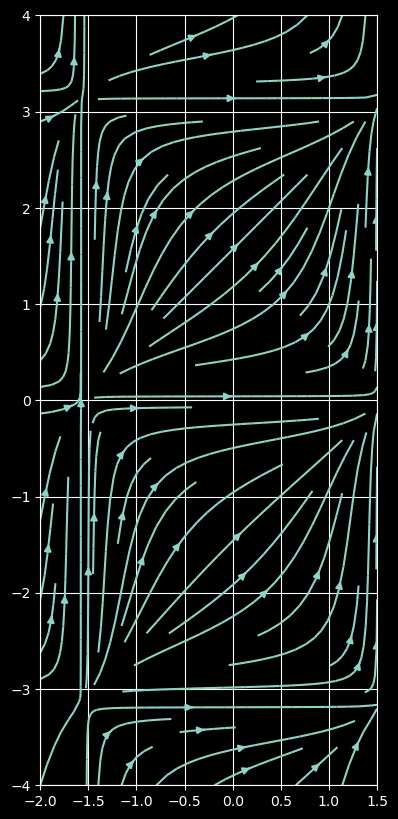

In [9]:
# type the formulas for the x and y components of the vector fields 
# (use np.cos and np.sin etc if not polynomial vector fields):
def V(x, y):    
    return  ( 2*x - y + 3*(x**2-y**2) + 2*x*y,   x - 3*y - 3*(x**2-y**2) + 3*x*y )

def f(x, y):    
    return  ( 1, 1/4*x**4 -1/2*x*2 )
    #return  ( 1,  y**2 - x ) 
    
def o(x, y):    
    return (np.cos(x)**2, np.sin(y)**2) 
    
fig, ax = plt.subplots(figsize=(10,10))
plt.grid()
ax.set_aspect('equal')    

# plot_dynamics(V, x_left=-2, x_right=4,  x_res=100, y_down=-4, y_up=2, y_res=100)
# plot_dynamics(o, x_left=-2, x_right=10, x_res=100, y_down=-4, y_up=4, y_res=100)


# plot_dynamics(fig=fig, ax=ax, vector_field=o, x_left=-2, x_right=10, x_res=100, y_down=-4, y_up=4, y_res=100)
plot_dynamics(fig=fig, ax=ax, vector_field=o, x_left=-2, x_right=1.5, x_res=100, y_down=-4, y_up=4, y_res=100)
# plot_dynamics(fig=fig, ax=ax, vector_field=o, x_left=4, x_right=10, x_res=100, y_down=-4, y_up=4, y_res=100)
plt.show()